# Preprocessing of Casia Dataset for Spatio Temporal Mapping Model.
Lakshminarayana, N.N., Narayan, N., Napp, N., Setlur, S. and Govindaraju, V., 2017, February. A discriminative spatio-temporal mapping of face for liveness detection. In 2017 IEEE International Conference on Identity, Security and Behavior Analysis (ISBA) (pp. 1-7). IEEE.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install gdown -q
!gdown 1q5DlO2cu43sxdOTVyp0W43IaqorikqC9
!gdown 1H9sg0daYdvMB7_F1o7g70fbla1PmVVq4
!gdown 1dEOIB10Q9UgOdzbb_ed_ad7egmNiURi0
!gdown 1LIGmaUMsFOnQahe5hi5rRyeWCJEsX6vT
!gdown 1LomiNJxNeNJ6W5KIH8GaeuhlJwvnqtTw
# !cp /content/drive/MyDrive/CASIA_FASD.rar /content/CASIA_FASD.rar

Downloading...
From: https://drive.google.com/uc?id=1q5DlO2cu43sxdOTVyp0W43IaqorikqC9
To: /kaggle/working/CASIA_FASD.rar
100%|█████████████████████████████████████████| 876M/876M [00:06<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H9sg0daYdvMB7_F1o7g70fbla1PmVVq4
To: /kaggle/working/deploy.prototxt.txt
100%|██████████████████████████████████████| 28.1k/28.1k [00:00<00:00, 26.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dEOIB10Q9UgOdzbb_ed_ad7egmNiURi0
To: /kaggle/working/res10_300x300_ssd_iter_140000.caffemodel
100%|██████████████████████████████████████| 10.7M/10.7M [00:00<00:00, 38.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LIGmaUMsFOnQahe5hi5rRyeWCJEsX6vT
To: /kaggle/working/haarcascade_frontalface_default.xml
100%|████████████████████████████████████████| 930k/930k [00:00<00:00, 94.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LomiNJxNeNJ6W5KIH8GaeuhlJwvnqtTw
To: /kaggle/working/haarcascade_eye.xml
100%|█████████

In [3]:
# %%capture
# !apt-get install unp
!apt-get install unrar
!mkdir 'CASIA_FASD'
!unrar x 'CASIA_FASD.rar' 'CASIA_FASD' -y




The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 113 kB of archives.
After this operation, 406 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 unrar amd64 1:5.6.6-2build1 [113 kB]
Fetched 113 kB in 1s (137 kB/s)
Selecting previously unselected package unrar.
(Reading database ... 105611 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.6.6-2build1_amd64.deb ...
Unpacking unrar (1:5.6.6-2build1) ...
Setting up unrar (1:5.6.6-2build1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode
update-alternatives: warning: skip creation of /usr/share/man/man1/unrar.1.gz because associated file /usr/share/man/man1/unrar-nonfree.1.gz (of link group unrar) doesn't exist
Processing triggers for man-db (2.9.1-1) ...

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Ros

In [4]:
# from IPython.display import FileLink, FileLinks
# FileLinks('./CASIA_FASD/test_release/13')

In [5]:
import cv2
import numpy as np
from scipy import signal
import video_face_utils as futils
modelFile = "res10_300x300_ssd_iter_140000.caffemodel"
configFile = "deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

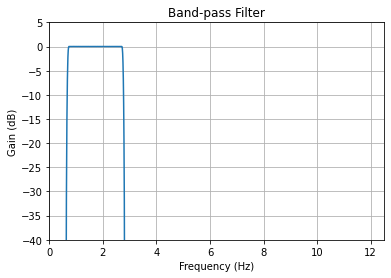

In [6]:
def plot_response(fs, w, h, title):

    "Utility function to plot response functions"

    fig = plt.figure()

    ax = fig.add_subplot(111)

    ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))

    ax.set_ylim(-40, 5)

    ax.set_xlim(0, 0.5*fs)

    ax.grid(True)

    ax.set_xlabel('Frequency (Hz)')

    ax.set_ylabel('Gain (dB)')

    ax.set_title(title)
taps = futils.bp_eqrple_filt(fs=24)
w, h = signal.freqz(taps, [1], worN=2000)
import matplotlib.pyplot as plt
plot_response(25, w, h, "Band-pass Filter")

  0%|          | 0/600 [00:00<?, ?it/s]

0: CASIA_FASD/train_release/11/6.avi


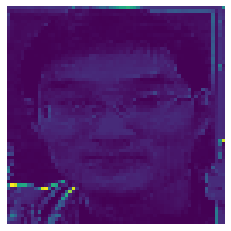

1: CASIA_FASD/train_release/11/HR_1.avi
2: CASIA_FASD/train_release/11/HR_2.avi
3: CASIA_FASD/train_release/11/8.avi
4: CASIA_FASD/train_release/11/5.avi
5: CASIA_FASD/train_release/11/7.avi
6: CASIA_FASD/train_release/11/HR_3.avi
7: CASIA_FASD/train_release/11/4.avi
8: CASIA_FASD/train_release/11/1.avi
9: CASIA_FASD/train_release/11/3.avi
10: CASIA_FASD/train_release/11/2.avi
11: CASIA_FASD/train_release/11/HR_4.avi
12: CASIA_FASD/train_release/19/6.avi
13: CASIA_FASD/train_release/19/HR_2.avi
14: CASIA_FASD/train_release/19/8.avi
15: CASIA_FASD/train_release/19/5.avi
16: CASIA_FASD/train_release/19/7.avi
17: CASIA_FASD/train_release/19/HR_3.avi
18: CASIA_FASD/train_release/19/4.avi
19: CASIA_FASD/train_release/19/1.avi
20: CASIA_FASD/train_release/19/3.avi


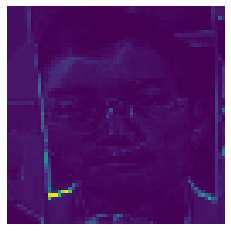

21: CASIA_FASD/train_release/19/2.avi
22: CASIA_FASD/train_release/19/HR_4.avi
23: CASIA_FASD/train_release/6/6.avi
24: CASIA_FASD/train_release/6/HR_1.avi
25: CASIA_FASD/train_release/6/HR_2.avi
26: CASIA_FASD/train_release/6/8.avi
27: CASIA_FASD/train_release/6/5.avi
28: CASIA_FASD/train_release/6/7.avi
29: CASIA_FASD/train_release/6/HR_3.avi
30: CASIA_FASD/train_release/6/4.avi
31: CASIA_FASD/train_release/6/1.avi
32: CASIA_FASD/train_release/6/3.avi
33: CASIA_FASD/train_release/6/2.avi
34: CASIA_FASD/train_release/6/HR_4.avi
35: CASIA_FASD/train_release/13/6.avi
36: CASIA_FASD/train_release/13/HR_1.avi
37: CASIA_FASD/train_release/13/HR_2.avi
38: CASIA_FASD/train_release/13/8.avi
39: CASIA_FASD/train_release/13/5.avi
40: CASIA_FASD/train_release/13/7.avi


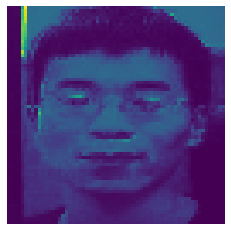

41: CASIA_FASD/train_release/13/HR_3.avi
42: CASIA_FASD/train_release/13/4.avi
43: CASIA_FASD/train_release/13/1.avi
44: CASIA_FASD/train_release/13/3.avi
45: CASIA_FASD/train_release/13/2.avi
46: CASIA_FASD/train_release/13/HR_4.avi
47: CASIA_FASD/train_release/3/6.avi
48: CASIA_FASD/train_release/3/HR_1.avi
49: CASIA_FASD/train_release/3/HR_2.avi
50: CASIA_FASD/train_release/3/8.avi
51: CASIA_FASD/train_release/3/5.avi
52: CASIA_FASD/train_release/3/7.avi
53: CASIA_FASD/train_release/3/HR_3.avi
54: CASIA_FASD/train_release/3/4.avi
55: CASIA_FASD/train_release/3/1.avi
56: CASIA_FASD/train_release/3/3.avi
57: CASIA_FASD/train_release/3/2.avi
58: CASIA_FASD/train_release/3/HR_4.avi
59: CASIA_FASD/train_release/2/6.avi
60: CASIA_FASD/train_release/2/HR_1.avi


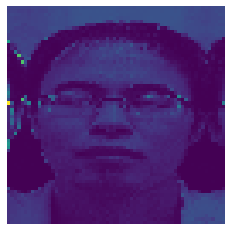

61: CASIA_FASD/train_release/2/HR_2.avi
62: CASIA_FASD/train_release/2/8.avi
63: CASIA_FASD/train_release/2/5.avi
64: CASIA_FASD/train_release/2/7.avi
65: CASIA_FASD/train_release/2/HR_3.avi
66: CASIA_FASD/train_release/2/4.avi
67: CASIA_FASD/train_release/2/1.avi
68: CASIA_FASD/train_release/2/3.avi
69: CASIA_FASD/train_release/2/2.avi
70: CASIA_FASD/train_release/2/HR_4.avi
71: CASIA_FASD/train_release/20/6.avi
72: CASIA_FASD/train_release/20/HR_1.avi
73: CASIA_FASD/train_release/20/HR_2.avi
74: CASIA_FASD/train_release/20/8.avi
75: CASIA_FASD/train_release/20/5.avi
76: CASIA_FASD/train_release/20/7.avi
77: CASIA_FASD/train_release/20/HR_3.avi
78: CASIA_FASD/train_release/20/4.avi
79: CASIA_FASD/train_release/20/1.avi
80: CASIA_FASD/train_release/20/3.avi


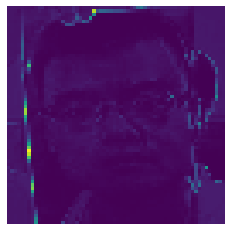

81: CASIA_FASD/train_release/20/2.avi
82: CASIA_FASD/train_release/20/HR_4.avi
83: CASIA_FASD/train_release/16/6.avi
84: CASIA_FASD/train_release/16/HR_1.avi
85: CASIA_FASD/train_release/16/HR_2.avi
86: CASIA_FASD/train_release/16/8.avi
87: CASIA_FASD/train_release/16/5.avi
88: CASIA_FASD/train_release/16/7.avi
89: CASIA_FASD/train_release/16/HR_3.avi
90: CASIA_FASD/train_release/16/4.avi
91: CASIA_FASD/train_release/16/1.avi
92: CASIA_FASD/train_release/16/3.avi
93: CASIA_FASD/train_release/16/2.avi
94: CASIA_FASD/train_release/16/HR_4.avi
95: CASIA_FASD/train_release/14/6.avi
96: CASIA_FASD/train_release/14/HR_1.avi
97: CASIA_FASD/train_release/14/HR_2.avi
98: CASIA_FASD/train_release/14/8.avi
99: CASIA_FASD/train_release/14/5.avi
100: CASIA_FASD/train_release/14/7.avi


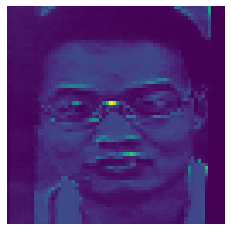

101: CASIA_FASD/train_release/14/HR_3.avi
102: CASIA_FASD/train_release/14/4.avi
103: CASIA_FASD/train_release/14/1.avi
104: CASIA_FASD/train_release/14/3.avi
105: CASIA_FASD/train_release/14/2.avi
106: CASIA_FASD/train_release/14/HR_4.avi
107: CASIA_FASD/train_release/7/6.avi
108: CASIA_FASD/train_release/7/HR_1.avi
109: CASIA_FASD/train_release/7/HR_2.avi
110: CASIA_FASD/train_release/7/8.avi
111: CASIA_FASD/train_release/7/5.avi
112: CASIA_FASD/train_release/7/7.avi
113: CASIA_FASD/train_release/7/HR_3.avi
114: CASIA_FASD/train_release/7/4.avi
115: CASIA_FASD/train_release/7/1.avi
116: CASIA_FASD/train_release/7/3.avi
117: CASIA_FASD/train_release/7/2.avi
118: CASIA_FASD/train_release/7/HR_4.avi
119: CASIA_FASD/train_release/1/6.avi
120: CASIA_FASD/train_release/1/HR_1.avi


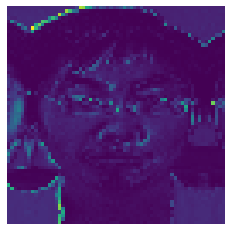

121: CASIA_FASD/train_release/1/HR_2.avi
122: CASIA_FASD/train_release/1/8.avi
123: CASIA_FASD/train_release/1/5.avi
124: CASIA_FASD/train_release/1/7.avi
125: CASIA_FASD/train_release/1/HR_3.avi
126: CASIA_FASD/train_release/1/4.avi
127: CASIA_FASD/train_release/1/1.avi
128: CASIA_FASD/train_release/1/3.avi
129: CASIA_FASD/train_release/1/2.avi
130: CASIA_FASD/train_release/1/HR_4.avi
131: CASIA_FASD/train_release/17/6.avi
132: CASIA_FASD/train_release/17/HR_1.avi
133: CASIA_FASD/train_release/17/HR_2.avi
134: CASIA_FASD/train_release/17/8.avi
135: CASIA_FASD/train_release/17/5.avi
136: CASIA_FASD/train_release/17/7.avi
137: CASIA_FASD/train_release/17/HR_3.avi
138: CASIA_FASD/train_release/17/4.avi
139: CASIA_FASD/train_release/17/1.avi
140: CASIA_FASD/train_release/17/3.avi


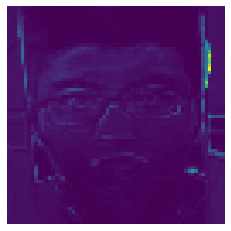

141: CASIA_FASD/train_release/17/2.avi
142: CASIA_FASD/train_release/17/HR_4.avi
143: CASIA_FASD/train_release/4/6.avi
144: CASIA_FASD/train_release/4/HR_1.avi
145: CASIA_FASD/train_release/4/HR_2.avi
146: CASIA_FASD/train_release/4/8.avi
147: CASIA_FASD/train_release/4/5.avi
148: CASIA_FASD/train_release/4/7.avi
149: CASIA_FASD/train_release/4/HR_3.avi
150: CASIA_FASD/train_release/4/4.avi
151: CASIA_FASD/train_release/4/1.avi
152: CASIA_FASD/train_release/4/3.avi
153: CASIA_FASD/train_release/4/2.avi
154: CASIA_FASD/train_release/4/HR_4.avi
155: CASIA_FASD/train_release/15/6.avi
156: CASIA_FASD/train_release/15/HR_1.avi
157: CASIA_FASD/train_release/15/HR_2.avi
158: CASIA_FASD/train_release/15/8.avi
159: CASIA_FASD/train_release/15/5.avi
160: CASIA_FASD/train_release/15/7.avi


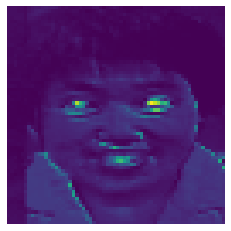

161: CASIA_FASD/train_release/15/HR_3.avi
162: CASIA_FASD/train_release/15/4.avi
163: CASIA_FASD/train_release/15/1.avi
164: CASIA_FASD/train_release/15/3.avi
165: CASIA_FASD/train_release/15/2.avi
166: CASIA_FASD/train_release/15/HR_4.avi
167: CASIA_FASD/train_release/18/6.avi
168: CASIA_FASD/train_release/18/HR_1.avi
169: CASIA_FASD/train_release/18/HR_2.avi
170: CASIA_FASD/train_release/18/8.avi
171: CASIA_FASD/train_release/18/5.avi
172: CASIA_FASD/train_release/18/7.avi
173: CASIA_FASD/train_release/18/HR_3.avi
174: CASIA_FASD/train_release/18/4.avi
175: CASIA_FASD/train_release/18/1.avi
176: CASIA_FASD/train_release/18/3.avi
177: CASIA_FASD/train_release/18/2.avi
178: CASIA_FASD/train_release/18/HR_4.avi
179: CASIA_FASD/train_release/10/6.avi
180: CASIA_FASD/train_release/10/HR_1.avi


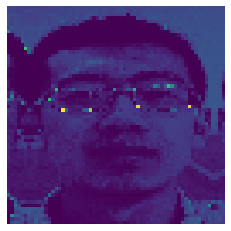

181: CASIA_FASD/train_release/10/HR_2.avi
182: CASIA_FASD/train_release/10/8.avi
183: CASIA_FASD/train_release/10/5.avi
184: CASIA_FASD/train_release/10/7.avi
185: CASIA_FASD/train_release/10/HR_3.avi
186: CASIA_FASD/train_release/10/4.avi
187: CASIA_FASD/train_release/10/1.avi
188: CASIA_FASD/train_release/10/3.avi
189: CASIA_FASD/train_release/10/2.avi
190: CASIA_FASD/train_release/10/HR_4.avi
191: CASIA_FASD/train_release/12/6.avi
192: CASIA_FASD/train_release/12/HR_1.avi
193: CASIA_FASD/train_release/12/HR_2.avi
194: CASIA_FASD/train_release/12/8.avi
195: CASIA_FASD/train_release/12/5.avi
196: CASIA_FASD/train_release/12/7.avi
197: CASIA_FASD/train_release/12/HR_3.avi
198: CASIA_FASD/train_release/12/4.avi
199: CASIA_FASD/train_release/12/1.avi
200: CASIA_FASD/train_release/12/3.avi


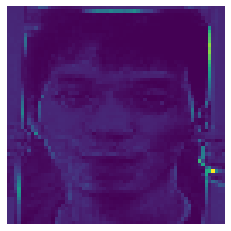

201: CASIA_FASD/train_release/12/2.avi
202: CASIA_FASD/train_release/12/HR_4.avi
203: CASIA_FASD/train_release/5/6.avi
204: CASIA_FASD/train_release/5/HR_1.avi
205: CASIA_FASD/train_release/5/HR_2.avi
206: CASIA_FASD/train_release/5/8.avi
207: CASIA_FASD/train_release/5/5.avi
208: CASIA_FASD/train_release/5/7.avi
209: CASIA_FASD/train_release/5/HR_3.avi
210: CASIA_FASD/train_release/5/4.avi
211: CASIA_FASD/train_release/5/1.avi
212: CASIA_FASD/train_release/5/3.avi
213: CASIA_FASD/train_release/5/2.avi
214: CASIA_FASD/train_release/5/HR_4.avi
215: CASIA_FASD/train_release/9/6.avi
216: CASIA_FASD/train_release/9/HR_1.avi
217: CASIA_FASD/train_release/9/HR_2.avi
218: CASIA_FASD/train_release/9/8.avi
219: CASIA_FASD/train_release/9/5.avi
220: CASIA_FASD/train_release/9/7.avi


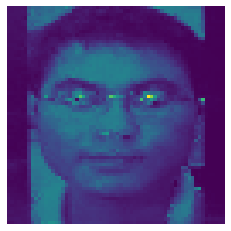

221: CASIA_FASD/train_release/9/HR_3.avi
222: CASIA_FASD/train_release/9/4.avi
223: CASIA_FASD/train_release/9/1.avi
224: CASIA_FASD/train_release/9/3.avi
225: CASIA_FASD/train_release/9/2.avi
226: CASIA_FASD/train_release/9/HR_4.avi
227: CASIA_FASD/train_release/8/6.avi
228: CASIA_FASD/train_release/8/HR_1.avi
229: CASIA_FASD/train_release/8/HR_2.avi
230: CASIA_FASD/train_release/8/8.avi
231: CASIA_FASD/train_release/8/5.avi
232: CASIA_FASD/train_release/8/7.avi
233: CASIA_FASD/train_release/8/HR_3.avi
234: CASIA_FASD/train_release/8/4.avi
235: CASIA_FASD/train_release/8/1.avi
236: CASIA_FASD/train_release/8/3.avi
237: CASIA_FASD/train_release/8/2.avi
238: CASIA_FASD/train_release/8/HR_4.avi
239: CASIA_FASD/test_release/11/6.avi
240: CASIA_FASD/test_release/11/HR_1.avi


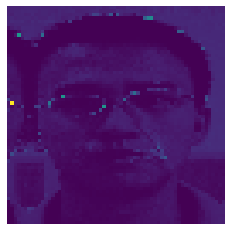

241: CASIA_FASD/test_release/11/HR_2.avi
242: CASIA_FASD/test_release/11/8.avi
243: CASIA_FASD/test_release/11/5.avi
244: CASIA_FASD/test_release/11/7.avi
245: CASIA_FASD/test_release/11/HR_3.avi
246: CASIA_FASD/test_release/11/4.avi
247: CASIA_FASD/test_release/11/1.avi
248: CASIA_FASD/test_release/11/3.avi
249: CASIA_FASD/test_release/11/2.avi
250: CASIA_FASD/test_release/11/HR_4.avi
251: CASIA_FASD/test_release/19/6.avi
252: CASIA_FASD/test_release/19/HR_1.avi
253: CASIA_FASD/test_release/19/HR_2.avi
254: CASIA_FASD/test_release/19/8.avi
255: CASIA_FASD/test_release/19/5.avi
256: CASIA_FASD/test_release/19/7.avi
257: CASIA_FASD/test_release/19/HR_3.avi
258: CASIA_FASD/test_release/19/4.avi
259: CASIA_FASD/test_release/19/1.avi
260: CASIA_FASD/test_release/19/3.avi


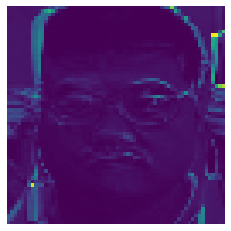

261: CASIA_FASD/test_release/19/2.avi
262: CASIA_FASD/test_release/19/HR_4.avi
263: CASIA_FASD/test_release/27/6.avi
264: CASIA_FASD/test_release/27/HR_1.avi
265: CASIA_FASD/test_release/27/HR_2.avi
266: CASIA_FASD/test_release/27/8.avi
267: CASIA_FASD/test_release/27/5.avi
268: CASIA_FASD/test_release/27/7.avi
269: CASIA_FASD/test_release/27/HR_3.avi
270: CASIA_FASD/test_release/27/4.avi
271: CASIA_FASD/test_release/27/1.avi
272: CASIA_FASD/test_release/27/3.avi
273: CASIA_FASD/test_release/27/2.avi
274: CASIA_FASD/test_release/27/HR_4.avi
275: CASIA_FASD/test_release/6/6.avi
276: CASIA_FASD/test_release/6/HR_1.avi
277: CASIA_FASD/test_release/6/HR_2.avi
278: CASIA_FASD/test_release/6/8.avi
279: CASIA_FASD/test_release/6/5.avi
280: CASIA_FASD/test_release/6/7.avi


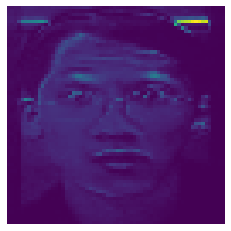

281: CASIA_FASD/test_release/6/HR_3.avi
282: CASIA_FASD/test_release/6/4.avi
283: CASIA_FASD/test_release/6/1.avi
284: CASIA_FASD/test_release/6/3.avi
285: CASIA_FASD/test_release/6/2.avi
286: CASIA_FASD/test_release/6/HR_4.avi
287: CASIA_FASD/test_release/13/6.avi
288: CASIA_FASD/test_release/13/HR_1.avi
289: CASIA_FASD/test_release/13/HR_2.avi
290: CASIA_FASD/test_release/13/8.avi
291: CASIA_FASD/test_release/13/5.avi
292: CASIA_FASD/test_release/13/7.avi
293: CASIA_FASD/test_release/13/HR_3.avi
294: CASIA_FASD/test_release/13/4.avi
295: CASIA_FASD/test_release/13/1.avi
296: CASIA_FASD/test_release/13/3.avi
297: CASIA_FASD/test_release/13/2.avi
298: CASIA_FASD/test_release/13/HR_4.avi
299: CASIA_FASD/test_release/3/6.avi
300: CASIA_FASD/test_release/3/HR_1.avi


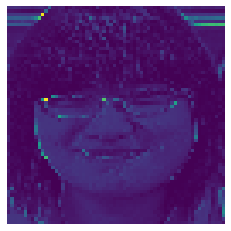

301: CASIA_FASD/test_release/3/HR_2.avi
302: CASIA_FASD/test_release/3/8.avi
303: CASIA_FASD/test_release/3/5.avi
304: CASIA_FASD/test_release/3/7.avi
305: CASIA_FASD/test_release/3/HR_3.avi
306: CASIA_FASD/test_release/3/4.avi
307: CASIA_FASD/test_release/3/1.avi
308: CASIA_FASD/test_release/3/3.avi
309: CASIA_FASD/test_release/3/2.avi
310: CASIA_FASD/test_release/3/HR_4.avi
311: CASIA_FASD/test_release/2/6.avi
312: CASIA_FASD/test_release/2/HR_1.avi
313: CASIA_FASD/test_release/2/HR_2.avi
314: CASIA_FASD/test_release/2/8.avi
315: CASIA_FASD/test_release/2/5.avi
316: CASIA_FASD/test_release/2/7.avi
317: CASIA_FASD/test_release/2/HR_3.avi
318: CASIA_FASD/test_release/2/4.avi
319: CASIA_FASD/test_release/2/1.avi
320: CASIA_FASD/test_release/2/3.avi


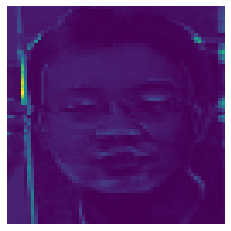

321: CASIA_FASD/test_release/2/2.avi
322: CASIA_FASD/test_release/2/HR_4.avi
323: CASIA_FASD/test_release/20/6.avi
324: CASIA_FASD/test_release/20/HR_1.avi
325: CASIA_FASD/test_release/20/HR_2.avi
326: CASIA_FASD/test_release/20/8.avi
327: CASIA_FASD/test_release/20/5.avi
328: CASIA_FASD/test_release/20/7.avi
329: CASIA_FASD/test_release/20/HR_3.avi
330: CASIA_FASD/test_release/20/4.avi
331: CASIA_FASD/test_release/20/1.avi
332: CASIA_FASD/test_release/20/3.avi
333: CASIA_FASD/test_release/20/2.avi
334: CASIA_FASD/test_release/20/HR_4.avi
335: CASIA_FASD/test_release/16/6.avi
336: CASIA_FASD/test_release/16/HR_1.avi
337: CASIA_FASD/test_release/16/HR_2.avi
338: CASIA_FASD/test_release/16/8.avi
339: CASIA_FASD/test_release/16/5.avi
340: CASIA_FASD/test_release/16/7.avi


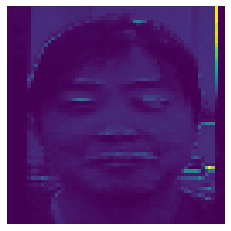

341: CASIA_FASD/test_release/16/HR_3.avi
342: CASIA_FASD/test_release/16/4.avi
343: CASIA_FASD/test_release/16/1.avi
344: CASIA_FASD/test_release/16/3.avi
345: CASIA_FASD/test_release/16/2.avi
346: CASIA_FASD/test_release/16/HR_4.avi
347: CASIA_FASD/test_release/14/6.avi
348: CASIA_FASD/test_release/14/HR_1.avi
349: CASIA_FASD/test_release/14/HR_2.avi
350: CASIA_FASD/test_release/14/8.avi
351: CASIA_FASD/test_release/14/5.avi
352: CASIA_FASD/test_release/14/7.avi
353: CASIA_FASD/test_release/14/HR_3.avi
354: CASIA_FASD/test_release/14/4.avi
355: CASIA_FASD/test_release/14/1.avi
356: CASIA_FASD/test_release/14/3.avi
357: CASIA_FASD/test_release/14/2.avi
358: CASIA_FASD/test_release/14/HR_4.avi
359: CASIA_FASD/test_release/7/6.avi
360: CASIA_FASD/test_release/7/HR_1.avi


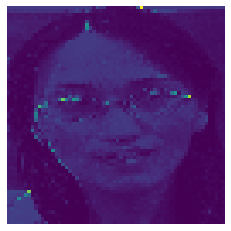

361: CASIA_FASD/test_release/7/HR_2.avi
362: CASIA_FASD/test_release/7/8.avi
363: CASIA_FASD/test_release/7/5.avi
364: CASIA_FASD/test_release/7/7.avi
365: CASIA_FASD/test_release/7/HR_3.avi
366: CASIA_FASD/test_release/7/4.avi
367: CASIA_FASD/test_release/7/1.avi
368: CASIA_FASD/test_release/7/3.avi
369: CASIA_FASD/test_release/7/2.avi
370: CASIA_FASD/test_release/7/HR_4.avi
371: CASIA_FASD/test_release/30/6.avi
372: CASIA_FASD/test_release/30/HR_1.avi
373: CASIA_FASD/test_release/30/HR_2.avi
374: CASIA_FASD/test_release/30/8.avi
375: CASIA_FASD/test_release/30/5.avi
376: CASIA_FASD/test_release/30/7.avi
377: CASIA_FASD/test_release/30/HR_3.avi
378: CASIA_FASD/test_release/30/4.avi
379: CASIA_FASD/test_release/30/1.avi
380: CASIA_FASD/test_release/30/3.avi


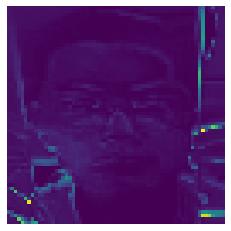

381: CASIA_FASD/test_release/30/2.avi
382: CASIA_FASD/test_release/30/HR_4.avi
383: CASIA_FASD/test_release/1/6.avi
384: CASIA_FASD/test_release/1/HR_1.avi
385: CASIA_FASD/test_release/1/HR_2.avi
386: CASIA_FASD/test_release/1/8.avi
387: CASIA_FASD/test_release/1/5.avi
388: CASIA_FASD/test_release/1/7.avi
389: CASIA_FASD/test_release/1/HR_3.avi
390: CASIA_FASD/test_release/1/4.avi
391: CASIA_FASD/test_release/1/1.avi
392: CASIA_FASD/test_release/1/3.avi
393: CASIA_FASD/test_release/1/2.avi
394: CASIA_FASD/test_release/1/HR_4.avi
395: CASIA_FASD/test_release/17/6.avi
396: CASIA_FASD/test_release/17/HR_1.avi
397: CASIA_FASD/test_release/17/HR_2.avi
398: CASIA_FASD/test_release/17/8.avi
399: CASIA_FASD/test_release/17/5.avi
400: CASIA_FASD/test_release/17/7.avi


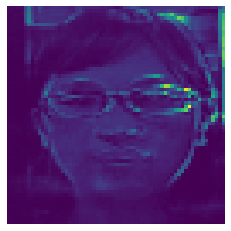

401: CASIA_FASD/test_release/17/HR_3.avi
402: CASIA_FASD/test_release/17/4.avi
403: CASIA_FASD/test_release/17/1.avi
404: CASIA_FASD/test_release/17/3.avi
405: CASIA_FASD/test_release/17/2.avi
406: CASIA_FASD/test_release/17/HR_4.avi
407: CASIA_FASD/test_release/29/6.avi
408: CASIA_FASD/test_release/29/HR_1.avi
409: CASIA_FASD/test_release/29/8.avi
410: CASIA_FASD/test_release/29/5.avi
411: CASIA_FASD/test_release/29/7.avi
412: CASIA_FASD/test_release/29/HR_3.avi
413: CASIA_FASD/test_release/29/4.avi
414: CASIA_FASD/test_release/29/1.avi
415: CASIA_FASD/test_release/29/3.avi
416: CASIA_FASD/test_release/29/2.avi
417: CASIA_FASD/test_release/29/HR_4.avi
418: CASIA_FASD/test_release/4/6.avi
419: CASIA_FASD/test_release/4/HR_1.avi
420: CASIA_FASD/test_release/4/HR_2.avi


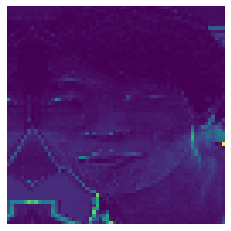

421: CASIA_FASD/test_release/4/8.avi
422: CASIA_FASD/test_release/4/5.avi
423: CASIA_FASD/test_release/4/7.avi
424: CASIA_FASD/test_release/4/HR_3.avi
425: CASIA_FASD/test_release/4/4.avi
426: CASIA_FASD/test_release/4/1.avi
427: CASIA_FASD/test_release/4/3.avi
428: CASIA_FASD/test_release/4/2.avi
429: CASIA_FASD/test_release/4/HR_4.avi
430: CASIA_FASD/test_release/15/6.avi
431: CASIA_FASD/test_release/15/HR_1.avi
432: CASIA_FASD/test_release/15/HR_2.avi
433: CASIA_FASD/test_release/15/8.avi
434: CASIA_FASD/test_release/15/5.avi
435: CASIA_FASD/test_release/15/7.avi
436: CASIA_FASD/test_release/15/HR_3.avi
437: CASIA_FASD/test_release/15/4.avi
438: CASIA_FASD/test_release/15/1.avi
439: CASIA_FASD/test_release/15/3.avi
440: CASIA_FASD/test_release/15/2.avi


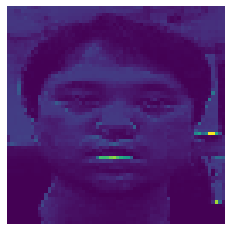

441: CASIA_FASD/test_release/15/HR_4.avi
442: CASIA_FASD/test_release/24/6.avi
443: CASIA_FASD/test_release/24/HR_1.avi
444: CASIA_FASD/test_release/24/HR_2.avi
445: CASIA_FASD/test_release/24/8.avi
446: CASIA_FASD/test_release/24/5.avi
447: CASIA_FASD/test_release/24/7.avi
448: CASIA_FASD/test_release/24/HR_3.avi
449: CASIA_FASD/test_release/24/4.avi
450: CASIA_FASD/test_release/24/1.avi
451: CASIA_FASD/test_release/24/3.avi
452: CASIA_FASD/test_release/24/2.avi
453: CASIA_FASD/test_release/24/HR_4.avi
454: CASIA_FASD/test_release/18/6.avi
455: CASIA_FASD/test_release/18/HR_1.avi
456: CASIA_FASD/test_release/18/HR_2.avi
457: CASIA_FASD/test_release/18/8.avi
458: CASIA_FASD/test_release/18/5.avi
459: CASIA_FASD/test_release/18/7.avi
460: CASIA_FASD/test_release/18/HR_3.avi


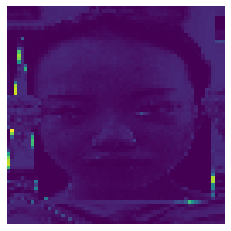

461: CASIA_FASD/test_release/18/4.avi
462: CASIA_FASD/test_release/18/1.avi
463: CASIA_FASD/test_release/18/3.avi
464: CASIA_FASD/test_release/18/2.avi
465: CASIA_FASD/test_release/18/HR_4.avi
466: CASIA_FASD/test_release/23/6.avi
467: CASIA_FASD/test_release/23/HR_1.avi
468: CASIA_FASD/test_release/23/HR_2.avi
469: CASIA_FASD/test_release/23/8.avi
470: CASIA_FASD/test_release/23/5.avi
471: CASIA_FASD/test_release/23/7.avi
472: CASIA_FASD/test_release/23/HR_3.avi
473: CASIA_FASD/test_release/23/4.avi
474: CASIA_FASD/test_release/23/1.avi
475: CASIA_FASD/test_release/23/3.avi
476: CASIA_FASD/test_release/23/2.avi
477: CASIA_FASD/test_release/23/HR_4.avi
478: CASIA_FASD/test_release/10/6.avi
479: CASIA_FASD/test_release/10/HR_1.avi
480: CASIA_FASD/test_release/10/HR_2.avi


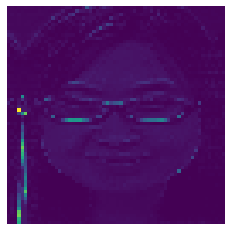

481: CASIA_FASD/test_release/10/8.avi
482: CASIA_FASD/test_release/10/5.avi
483: CASIA_FASD/test_release/10/7.avi
484: CASIA_FASD/test_release/10/HR_3.avi
485: CASIA_FASD/test_release/10/4.avi
486: CASIA_FASD/test_release/10/1.avi
487: CASIA_FASD/test_release/10/3.avi
488: CASIA_FASD/test_release/10/2.avi
489: CASIA_FASD/test_release/10/HR_4.avi
490: CASIA_FASD/test_release/25/6.avi
491: CASIA_FASD/test_release/25/HR_1.avi
492: CASIA_FASD/test_release/25/HR_2.avi
493: CASIA_FASD/test_release/25/8.avi
494: CASIA_FASD/test_release/25/5.avi
495: CASIA_FASD/test_release/25/7.avi
496: CASIA_FASD/test_release/25/HR_3.avi
497: CASIA_FASD/test_release/25/4.avi
498: CASIA_FASD/test_release/25/1.avi
499: CASIA_FASD/test_release/25/3.avi
500: CASIA_FASD/test_release/25/2.avi


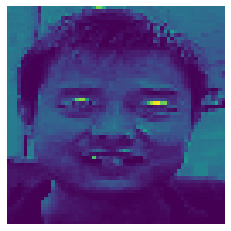

501: CASIA_FASD/test_release/25/HR_4.avi
502: CASIA_FASD/test_release/12/6.avi
503: CASIA_FASD/test_release/12/HR_1.avi
504: CASIA_FASD/test_release/12/HR_2.avi
505: CASIA_FASD/test_release/12/8.avi
506: CASIA_FASD/test_release/12/5.avi
507: CASIA_FASD/test_release/12/7.avi
508: CASIA_FASD/test_release/12/HR_3.avi
509: CASIA_FASD/test_release/12/4.avi
510: CASIA_FASD/test_release/12/1.avi
511: CASIA_FASD/test_release/12/3.avi
512: CASIA_FASD/test_release/12/2.avi
513: CASIA_FASD/test_release/12/HR_4.avi
514: CASIA_FASD/test_release/22/6.avi
515: CASIA_FASD/test_release/22/HR_1.avi
516: CASIA_FASD/test_release/22/HR_2.avi
517: CASIA_FASD/test_release/22/8.avi
518: CASIA_FASD/test_release/22/5.avi
519: CASIA_FASD/test_release/22/7.avi
520: CASIA_FASD/test_release/22/HR_3.avi


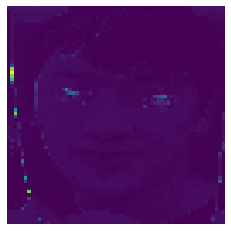

521: CASIA_FASD/test_release/22/4.avi
522: CASIA_FASD/test_release/22/1.avi
523: CASIA_FASD/test_release/22/3.avi
524: CASIA_FASD/test_release/22/2.avi
525: CASIA_FASD/test_release/22/HR_4.avi
526: CASIA_FASD/test_release/26/6.avi
527: CASIA_FASD/test_release/26/HR_1.avi
528: CASIA_FASD/test_release/26/HR_2.avi
529: CASIA_FASD/test_release/26/8.avi
530: CASIA_FASD/test_release/26/5.avi
531: CASIA_FASD/test_release/26/7.avi
532: CASIA_FASD/test_release/26/HR_3.avi
533: CASIA_FASD/test_release/26/4.avi
534: CASIA_FASD/test_release/26/1.avi
535: CASIA_FASD/test_release/26/3.avi
536: CASIA_FASD/test_release/26/2.avi
537: CASIA_FASD/test_release/26/HR_4.avi
538: CASIA_FASD/test_release/21/6.avi
539: CASIA_FASD/test_release/21/HR_1.avi
540: CASIA_FASD/test_release/21/HR_2.avi


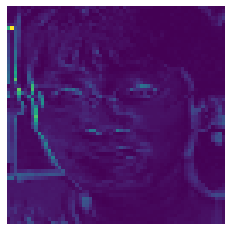

541: CASIA_FASD/test_release/21/8.avi
542: CASIA_FASD/test_release/21/5.avi
543: CASIA_FASD/test_release/21/7.avi
544: CASIA_FASD/test_release/21/HR_3.avi
545: CASIA_FASD/test_release/21/4.avi
546: CASIA_FASD/test_release/21/1.avi
547: CASIA_FASD/test_release/21/3.avi
548: CASIA_FASD/test_release/21/2.avi
549: CASIA_FASD/test_release/21/HR_4.avi
550: CASIA_FASD/test_release/28/6.avi
551: CASIA_FASD/test_release/28/HR_1.avi
552: CASIA_FASD/test_release/28/HR_2.avi
553: CASIA_FASD/test_release/28/8.avi
554: CASIA_FASD/test_release/28/5.avi
555: CASIA_FASD/test_release/28/7.avi
556: CASIA_FASD/test_release/28/HR_3.avi
557: CASIA_FASD/test_release/28/4.avi
558: CASIA_FASD/test_release/28/1.avi
559: CASIA_FASD/test_release/28/3.avi
560: CASIA_FASD/test_release/28/2.avi


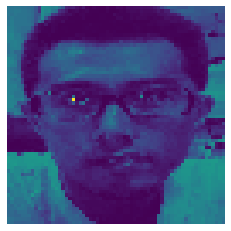

561: CASIA_FASD/test_release/28/HR_4.avi
562: CASIA_FASD/test_release/5/6.avi
563: CASIA_FASD/test_release/5/HR_1.avi
564: CASIA_FASD/test_release/5/HR_2.avi
565: CASIA_FASD/test_release/5/8.avi
566: CASIA_FASD/test_release/5/5.avi
567: CASIA_FASD/test_release/5/7.avi
568: CASIA_FASD/test_release/5/HR_3.avi
569: CASIA_FASD/test_release/5/4.avi
570: CASIA_FASD/test_release/5/1.avi
571: CASIA_FASD/test_release/5/3.avi
572: CASIA_FASD/test_release/5/2.avi
573: CASIA_FASD/test_release/5/HR_4.avi
574: CASIA_FASD/test_release/9/6.avi
575: CASIA_FASD/test_release/9/HR_1.avi
576: CASIA_FASD/test_release/9/HR_2.avi
577: CASIA_FASD/test_release/9/8.avi
578: CASIA_FASD/test_release/9/5.avi
579: CASIA_FASD/test_release/9/7.avi
580: CASIA_FASD/test_release/9/HR_3.avi


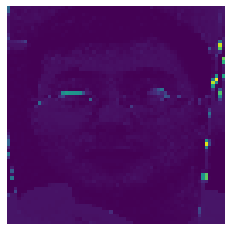

581: CASIA_FASD/test_release/9/4.avi
582: CASIA_FASD/test_release/9/1.avi
583: CASIA_FASD/test_release/9/3.avi
584: CASIA_FASD/test_release/9/2.avi
585: CASIA_FASD/test_release/9/HR_4.avi
586: CASIA_FASD/test_release/8/6.avi
587: CASIA_FASD/test_release/8/HR_1.avi
588: CASIA_FASD/test_release/8/HR_2.avi
589: CASIA_FASD/test_release/8/8.avi
590: CASIA_FASD/test_release/8/5.avi
591: CASIA_FASD/test_release/8/7.avi
592: CASIA_FASD/test_release/8/HR_3.avi
593: CASIA_FASD/test_release/8/4.avi
594: CASIA_FASD/test_release/8/1.avi
595: CASIA_FASD/test_release/8/3.avi
596: CASIA_FASD/test_release/8/2.avi
597: CASIA_FASD/test_release/8/HR_4.avi


In [7]:
# %debug
import os
import gc
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from csv import writer
# from itertools import chain
import re
c = tqdm(range(600))
count = 0 
disp = np.random.randint(8,16)
for subdir, dirs, files in os.walk('CASIA_FASD'):
    for file in files:
#         if 'HR_' in file:
#             import pdb;pdb.set_trace()
        path = os.path.join(subdir,file)    
        is_HR = 'HR_' in path

        
        is_train = 'train' in path
#         if os.path.isfile(path.replace('CASIA_FASD', 'done')):
#             continue
        video = futils.read_vid(path)
        fc = video.shape[0]
        video = futils.detect_vid_wrapper(video[1:-1], net, 0.5, dims=(64, 64), bbox_exp = 0.2, fill = 'reflect')
        if video.shape[0] == 0 or video is None:
            with open('no_faces.txt', 'a',) as f:  
                f.write(f'{path}: {video}\n')
            continue
        
        video = futils.eqHist(video)
        
        
        sub_clips = np.split(video, np.arange(24,len(video),24))
        if len(sub_clips[-1]) <24:
            sub_clips = sub_clips[:-1]
#         if file.startswith('1') or file.startswith('2') or file.startswith('HR_1'):
#             label = True
#         else:
#             label = False
        person = re.sub(r'.+_release\/','',subdir)
        if file.startswith('1') or file.startswith('2') or file.startswith('HR_1'):
            label = 0
        else:
            label = 1
        for clip in  sub_clips:
            Map = futils.freq_analysis_wrapper(clip, taps, fs = 24)
            with open('MAPPED_CASIA_FASD.csv', 'a', newline='') as f_object:  
                writer_object = writer(f_object)
                writer_object.writerow([*Map.ravel(), is_train, is_HR, person, fc, label])
#         os.makedirs(subdir.replace('CASIA_FASD', 'done'), exist_ok = True)
#         with open(path.replace('CASIA_FASD', 'done'),'a') as f:
#             f.write('done')
        print(f'{c.n}: {path}')    
        if c.n % 20 == 0:
            plt.imshow(Map)
            plt.axis('off')
            plt.show()
        c.update()
        gc.collect()
# print(c)
# os.path.getsize('MAPPED_CASIA_FASD2.csv')/(1024.0**2)

In [8]:
!rm -r CASIA_FASD
!rm CASIA_FASD.zip

rm: cannot remove 'CASIA_FASD.zip': No such file or directory
